In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import csv
import datetime

In [4]:
covidcsv = pd.read_csv("Covid Cases.csv")
vaccine = pd.read_csv("Covid Vaccines.csv")
AgeGroupMen = pd.read_excel("SeriesReport-1.xlsx")
MenAge16To24 = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age 16-24")
MenAge25To34 = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age 25-34")
MenAge35To44 = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age 35-44")
MenAge45To54 = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age 45-54")
MenAge55To64 = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age 55-64")
MenAge65AndUp = pd.read_excel("SeriesReport-1.xlsx", sheet_name="M - Age >= 65")
AgeGroupWomen = pd.read_excel("SeriesReport-2.xlsx")
WomenAge16To24 = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age 16-24")
WomenAge25To34 = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age 25-34")
WomenAge35To44 = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age 35-44")
WomenAge45To54 = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age 45-54")
WomenAge55To64 = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age 55-64")
WomenAge65AndUp = pd.read_excel("SeriesReport-2.xlsx", sheet_name="W - Age >= 65")
Gender = pd.read_excel("SeriesReport-3.xlsx")
Men = pd.read_excel("SeriesReport-3.xlsx", sheet_name="Unemp. Rate - Men")
Women = pd.read_excel("SeriesReport-3.xlsx", sheet_name="Unemp. Rate - Women")


In [5]:
Cases = covidcsv["cases"]
TotalVaccine = vaccine["Covid_Vacs_Administered"]
AgeGroupMenCombined = [MenAge16To24, MenAge25To34, MenAge35To44, MenAge45To54, MenAge55To64, MenAge65AndUp]
CombinedFrame = pd.concat(AgeGroupMenCombined, ignore_index=True)
CombinedFrame

,Month/Year,Unemployment Rate
0,Jan-19,11.2
1,Feb-19,10.3
2,Mar-19,10.3
3,Apr-19,8.7
4,May-19,9.6
...,...,...
175,Feb-21,5.5
176,Mar-21,5.1
177,Apr-21,4.5
178,May-21,4.8


In [6]:
covidcsv["Month/Year"] = pd.to_datetime(covidcsv["date"])
#covidcsv["Month"]=covidcsv["Month/Year"].dt.month
#covidcsv["Month"]=datetime.datetime.strptime(covidcsv["Month"],"%m")
#covidcsv["Month"]=covidcsv["Month"].strftime("%b")
covidcsv["Month"]=covidcsv["Month/Year"].dt.month_name(locale='English')
covidcsv

,date,Month/Year,cases,deaths,Month
0,1/21/2020,2020-01-21,1,0,January
1,1/22/2020,2020-01-22,1,0,January
2,1/23/2020,2020-01-23,1,0,January
3,1/24/2020,2020-01-24,2,0,January
4,1/25/2020,2020-01-25,3,0,January
...,...,...,...,...,...
534,7/8/2021,2021-07-08,33769600,605792,July
535,7/9/2021,2021-07-09,33804801,606198,July
536,7/10/2021,2021-07-10,33813392,606289,July
537,7/11/2021,2021-07-11,33819518,606319,July


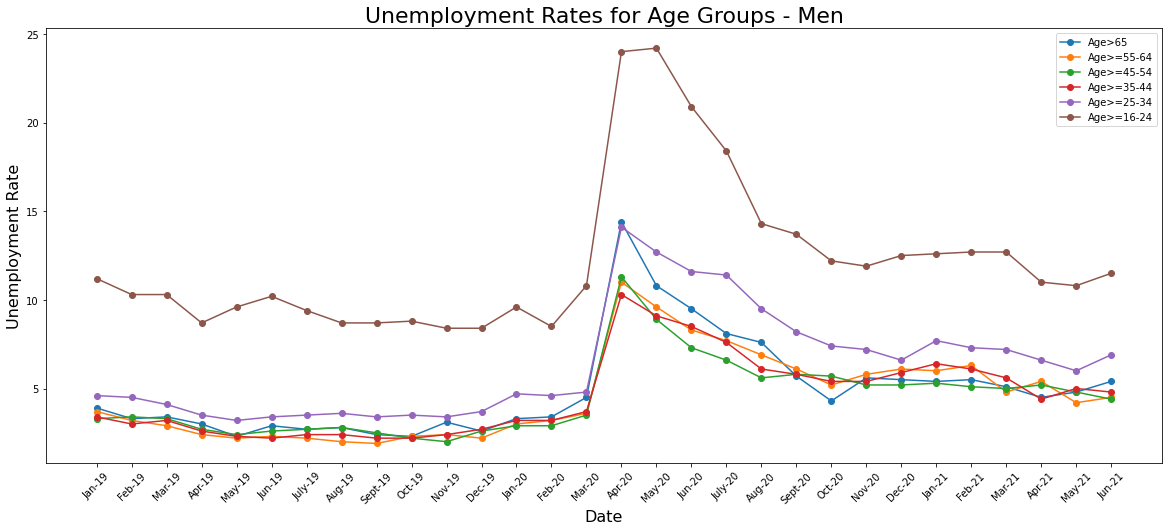

In [57]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Unemployment Rates for Age Groups - Men", fontsize=22)
plt.plot(MenAge65AndUp["Month/Year"], MenAge65AndUp["Unemployment Rate"], marker= 'o')
plt.plot(MenAge55To64["Month/Year"], MenAge55To64["Unemployment Rate"], marker= 'o')
plt.plot(MenAge45To54["Month/Year"], MenAge45To54["Unemployment Rate"], marker= 'o')
plt.plot(MenAge35To44["Month/Year"], MenAge35To44["Unemployment Rate"], marker= 'o')
plt.plot(MenAge25To34["Month/Year"], MenAge25To34["Unemployment Rate"], marker= 'o')
plt.plot(MenAge16To24["Month/Year"], MenAge16To24["Unemployment Rate"], marker= 'o')
plt.legend(["Age>65", "Age>=55-64","Age>=45-54","Age>=35-44","Age>=25-34","Age>=16-24"])
plt.ylabel("Unemployment Rate", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

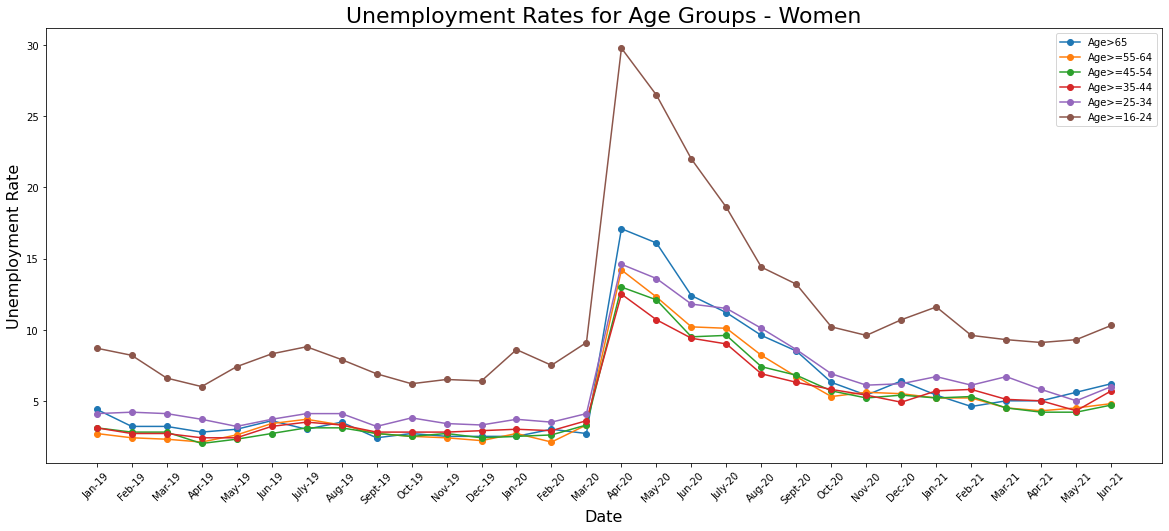

In [59]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Unemployment Rates for Age Groups - Women", fontsize=22)
plt.plot(WomenAge65AndUp["Month/Year"], WomenAge65AndUp["Unemployment Rate"], marker= 'o')
plt.plot(WomenAge55To64["Month/Year"], WomenAge55To64["Unemployment Rate"], marker= 'o')
plt.plot(WomenAge45To54["Month/Year"], WomenAge45To54["Unemployment Rate"], marker= 'o')
plt.plot(WomenAge35To44["Month/Year"], WomenAge35To44["Unemployment Rate"], marker= 'o')
plt.plot(WomenAge25To34["Month/Year"], WomenAge25To34["Unemployment Rate"], marker= 'o')
plt.plot(WomenAge16To24["Month/Year"], WomenAge16To24["Unemployment Rate"], marker= 'o')
plt.legend(["Age>65", "Age>=55-64","Age>=45-54","Age>=35-44","Age>=25-34","Age>=16-24"])
plt.ylabel("Unemployment Rate", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

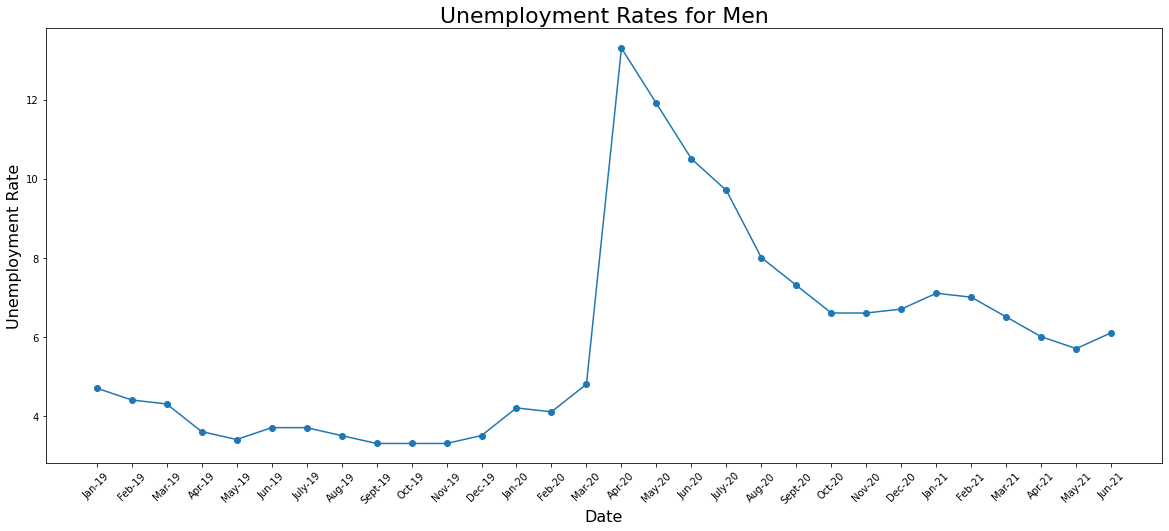

In [61]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Unemployment Rates for Men", fontsize=22)
plt.plot(Men["Month/Year"], Men["Unemployment Rate"], marker= 'o')
plt.ylabel("Unemployment Rate", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

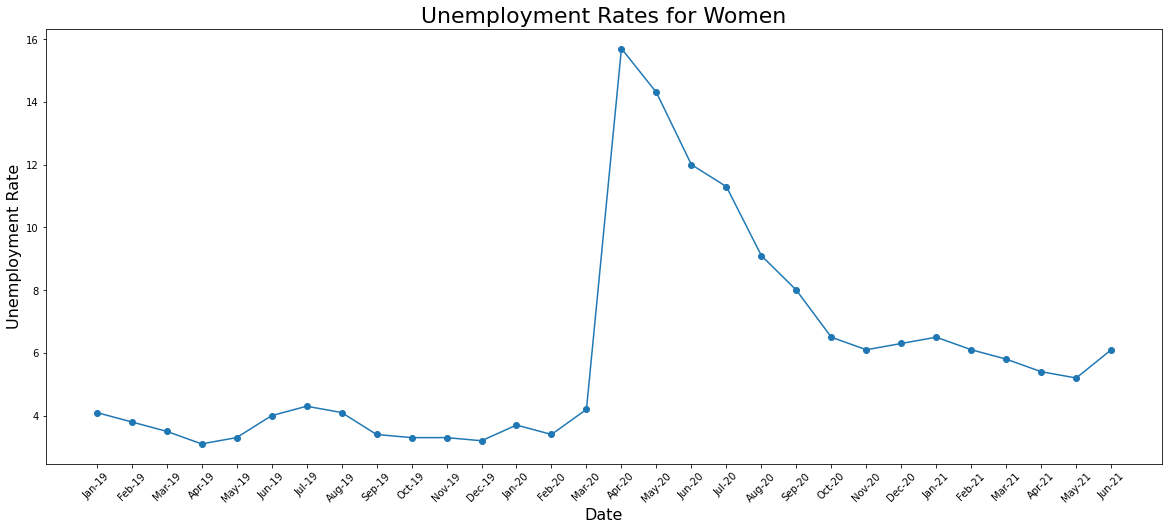

In [62]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Unemployment Rates for Women", fontsize=22)
plt.plot(Women["Month/Year"], Women["Unemployment Rate"], marker= 'o')
plt.ylabel("Unemployment Rate", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

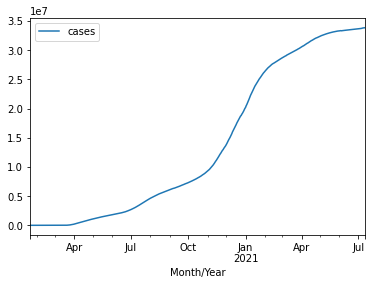

In [60]:
#Number of Covid Cases 2020-21
covidcsv.plot(kind="line", x="Month/Year", y="cases")

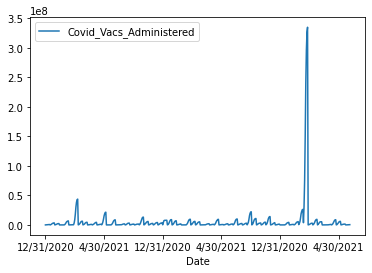

In [37]:
# Number of Vaccines Administered 2020-21
vaccine.plot(kind="line", x="Date", y="Covid_Vacs_Administered")